In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import seaborn as sns
!pip install miceforest
import miceforest as mf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:


def split_categ_numer(df):
    """
    Function to split dataframe into two, one having categorical columns and another having numerical columns
    Parameters
    ----------
    df : dataframe
            pass in full dataframe
    ----------
    Returns: 
        dataframe with categorical columns
        dataframe with numerical columns
    """
    categorical_col = []
    numerical_col = []
    for c in df.columns:
        if df[c].dtype =='object':
            categorical_col.append(c)
        else:
            numerical_col.append(c)
    return df[categorical_col], df[numerical_col]
   

DATA READING AND EXPLORATION

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
df_train = pd.read_csv("/content/loan_prediction_train.csv")
df_test = pd.read_csv("/content/loan_prediction_Test.csv")

In [140]:
print("Train has {} rows" .format(len(df_train)))
print("Test has {} rows" .format(len(df_test)))

Train has 614 rows
Test has 367 rows


In [141]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [142]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [143]:
print("\n\n Columns")
df_train.columns.values



 Columns


array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [144]:
print("\n\n Columns")
df_test.columns.values



 Columns


array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'], dtype=object)

In [145]:
print("number of duplicate records in train - {}".format(df_train.duplicated().sum()))
print("number of duplicate records in test - {}".format(df_test.duplicated().sum()))

number of duplicate records in train - 0
number of duplicate records in test - 0


In [146]:
df_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [147]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [149]:
approved = len(df_train[df_train['Loan_Status']=='Y'])
rejected = len(df_train[df_train['Loan_Status']=='N'])
print("proportion of 'No' vs 'Yes' {:>3.2f}%".format(rejected/approved*100))

proportion of 'No' vs 'Yes' 45.50%


In [150]:
df_train = df_train.drop('Loan_ID', axis=1)
df_test = df_test.drop('Loan_ID', axis=1)
x = df_train.drop(['Loan_Status'], axis=1)
y = df_train['Loan_Status']

DATA VISUALIZATION

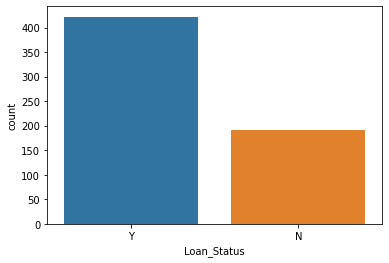

In [151]:
sns.countplot(x='Loan_Status', data=df_train)

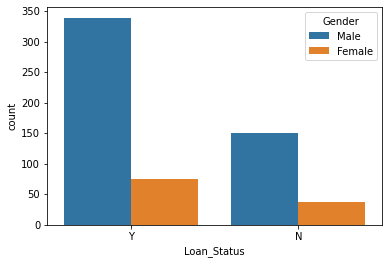

In [152]:
sns.countplot(x='Loan_Status', data=df_train, hue='Gender')

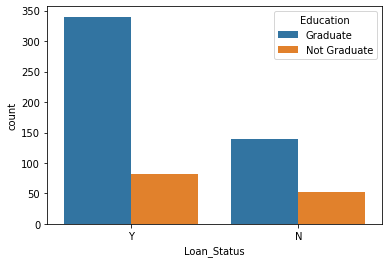

In [153]:
sns.countplot(x='Loan_Status', data=df_train, hue='Education')

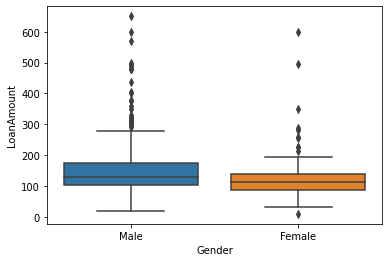

In [154]:
sns.boxplot(x='Gender', y='LoanAmount', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


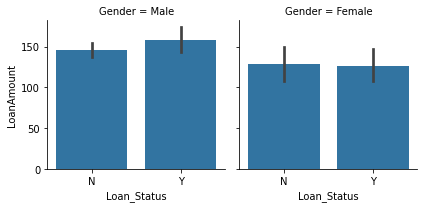

In [155]:
fg = sns.FacetGrid(df_train, col='Gender')
fg.map(sns.barplot, 'Loan_Status', 'LoanAmount' )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


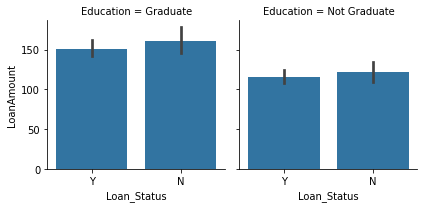

In [156]:
fg = sns.FacetGrid(df_train, col='Education')
fg.map(sns.barplot, 'Loan_Status', 'LoanAmount' )

DATA PREPROCESSING

In [157]:
categorical_transformer = Pipeline(steps = [('simple_imputer',SimpleImputer(strategy='most_frequent')),
                                            ('one_hot_encodr', OneHotEncoder(sparse=False))
                                           ])

numerical_transformer = Pipeline(steps = [('iterative_imputer', IterativeImputer())])

In [158]:
# creating categorical train dataset and numerical train dataset
cat_train_df, numeri_train_df = split_categ_numer(x)

# extracting the categroical column names and numerical column names
cat_train_features = cat_train_df.columns
num_train_features = numeri_train_df.columns

In [159]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_train_features),
        ('cat', categorical_transformer, cat_train_features)
        ])

In [160]:
x_train,x_test, y_train, y_test = train_test_split(x,y, train_size=70, random_state=42)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = pd.Series(lb.fit_transform(y_train))
y_test = pd.Series(lb.transform(y_test))

In [161]:
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

scores= []
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    pipe.fit(x_train, y_train)   
    scores.append(pipe.score(x_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iterative_imputer',
                                                                   IterativeImputer())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encodr',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Emplo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iterative_imputer',
                                                                   IterativeImputer())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encodr',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Emplo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iterative_imputer',
                                                                   IterativeImputer())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encodr',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Emplo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iterative_imputer',
                                                                   IterativeImputer())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encodr',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Emplo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iterative_imputer',
                                                                   IterativeImputer())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encodr',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Emplo

           models    scores
0             knn  0.669118
1   decision tree  0.645221
2   random forest  0.715074
3       ada boost  0.665441
4  gradient boost  0.737132


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

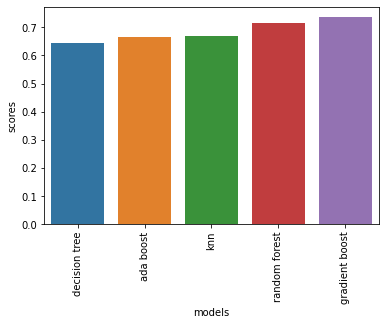

In [162]:
ml_model = ['knn','decision tree', 'random forest', 'ada boost', 'gradient boost']
df_x = pd.DataFrame(list(zip(ml_model,scores)), columns=['models','scores'])
print(df_x)
sns.barplot(x='models', y='scores', data=df_x.sort_values(by='scores'), )
plt.xticks(rotation=90)
plt.show()

WITH GRID SEARCH

In [164]:
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

knn_param_grid = {
                'classifier__n_neighbors':[2,3,4,5]
                }

dt_param_grid = { 
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
        }
  
  
rf_param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']
    }


ada_param_grid = {
         'classifier__n_estimators':[200, 500]#,
        }

gbc_param_grid = {
              "classifier__learning_rate": [0.1,0.01,0.001]
        }

grids = [knn_param_grid, dt_param_grid, rf_param_grid, ada_param_grid, gbc_param_grid]
scores = []
best_params= []
for i, model in enumerate(classifiers):
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    CV = GridSearchCV(pipe, grids[i], n_jobs= 1)
    CV.fit(x_train, y_train)    
    best_params.append(CV.best_params_)
    scores.append(CV.best_score_)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('iterative_imputer',
                                                                                          IterativeImputer())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot_encodr',
        

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('iterative_imputer',
                                                                                          IterativeImputer())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot_encodr',
        

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('iterative_imputer',
                                                                                          IterativeImputer())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('o...
                    

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('iterative_imputer',
                                                                                          IterativeImputer())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot_encodr',
        

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('iterative_imputer',
                                                                                          IterativeImputer())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot_encodr',
        

           models    scores
0             knn  0.628571
1   decision tree  0.742857
2   random forest  0.757143
3       ada boost  0.600000
4  gradient boost  0.742857


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

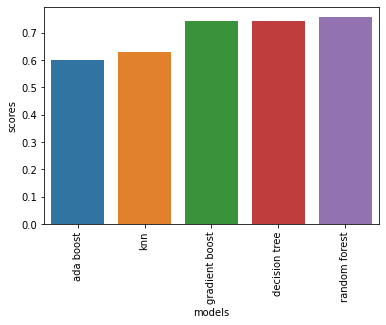

In [165]:
ml_model = ['knn','decision tree', 'random forest', 'ada boost', 'gradient boost']
df_x = pd.DataFrame(list(zip(ml_model,scores)), columns=['models','scores'])
print(df_x)
sns.barplot(x='models', y='scores', data=df_x.sort_values(by='scores'))
plt.xticks(rotation=90)
plt.show()

PRODUCTION MODEL

In [166]:
random_forest_param = best_params[3]
print(random_forest_param)

{'classifier__n_estimators': 200}


In [167]:
rf = Pipeline(steps = [('preprocessor',preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators= 200))])
rf.fit(x, y)
y_pred = rf.predict(df_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iterative_imputer',
                                                                   IterativeImputer())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encodr',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Emplo

In [168]:
y_pred_series = pd.Series(y_pred)
d = pd.concat([df_test, pd.DataFrame(y_pred_series)], axis=1)
d


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y
